January: Part 4 - This notebook is a continuation of gyre_runs_mackenzie02.ipynb. The configuration used to produce these results is still gyre_mackenzie02.

Since Part 3:
* This is a strict continuation of part 3.
* The purpose is to make further improvements on runs that use the final open boundary method of Runs 15, 16, and 18.

In [4]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/modules/')
import functions_plot

from salishsea_tools import nc_tools

In [5]:
def plot_gyre_times(gridT, var, depth_ind, time_inds, cmax, cmaps, max_min, supttl):
    cmaps.set_bad('wheat')
    fig, ax = plt.subplots(1, len(time_inds), figsize=(20, 4.5), sharex=True, sharey=True)
    for i, n in zip(time_inds, np.arange(len(time_inds))):
        if max_min == True:
            cmin = -cmax
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax)
            if n == 0:
                cbar = fig.colorbar(c, ax=ax[0])
        elif max_min == False:
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps)
            cbar = fig.colorbar(c, ax=ax[n])
        elif max_min == 'tem' or max_min == 'sal':
            cmin = var[:,depth_ind,:,:].min()
            cmax = var[:,depth_ind,:,:].max()
            c = ax[n].pcolormesh(var[i,depth_ind,:,:], cmap=cmaps, vmin = cmin, vmax = cmax)
            cbar = fig.colorbar(c, ax=ax[n])
        timestamp = nc_tools.timestamp(gridT,i).format('MMM DD HH:mm')
        ax[n].set_title(timestamp, fontsize=16)
        ax[n].set_xlim(0,var.shape[3])
        ax[n].set_ylim(0,var.shape[2])
        ax[n].xaxis.set_visible(False); ax[n].yaxis.set_visible(False)
    title = supttl
    fig.tight_layout(); fig.subplots_adjust(top=0.85); fig.suptitle(title, fontsize=20)
    return fig, ax

In [6]:
path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run15'
gridT_15, lon_15, lat_15, tem_15, sal_15, ssh_15, U_15, V_15, W_15 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run16'
gridT_16, lon_16, lat_16, tem_16, sal_16, ssh_16, U_16, V_16, W_16 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run17'
gridT_17, lon_17, lat_17, tem_17, sal_17, ssh_17, U_17, V_17, W_17 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_idealized/Run18'
gridT_18, lon_18, lat_18, tem_18, sal_18, ssh_18, U_18, V_18, W_18 = functions_plot.load_model_output(path, cfg)

cfg = 'gyre_mackenzie02/EXP00/runs_realistic/Run19'
gridT_19, lon_19, lat_19, tem_19, sal_19, ssh_19, U_19, V_19, W_19 = functions_plot.load_model_output(path, cfg)

1. mackenzie_canyon/bathymetry/initial_sets/idealized/**ideal_bathy_03.nc**
2. mackenzie_canyon/bathymetry/initial_sets/realistic/**real_bathy_01.nc**
3. mackenzie_canyon/bathymetry/initial_sets/coordinates/**coords_01.nc**
4. mackenzie_canyon/conditions/stratification_files/**temp_strat.nc** & **temp_strat_real.nc**
5. mackenzie_canyon/conditions/stratification_files/**salt_strat.nc** & **temp_strat_real.nc**


|Parameter      |Run15    |Run16    |Run17|Run18    |Run19|
|---------------|---------|---------|-----|---------|-----|
|bathy          |ideal    |ideal    |real |ideal    |real |
|ln_bt_nn_auto  |False    |         |     |         |     |    
|rn_bt_cmax     |NA       |         |     |         |     |
|rn_rdt         |20       |         |     |10       |     |
|nn_baro        |4        |         |     |         |     |
|nn_itend       |21600(5d)|         |     |43200(5d)|     |
|nn_write       |1080(6h) |         |     |2160(6h) |     |
|nn_tau000 [ts] |4320(1d) |         |     |8640(1d) |     |
|rn_utau0 [N/m2]|-5.0     |-0.1     |     |         |     |
|rn_vtau0 [N/m2]|0        |         |     |         |     |
|jperio         |cyclic   |         |     |         |     |
|rn_shlat       |0.5      |         |     |         |     |
|rn_aeiv_0      |50       |         |     |         |     |
|rn_ahm_0_lap   |50       |         |     |         |     |
|nb_bdy         |1        |         |     |         |     |
|cn_dyn2d       |flather  |         |     |         |     |
|cn_dyn3d       |orlanski |         |     |         |     |
|cn_tra         |neumann  |         |     |         |     |
|nbdyind        |-1       |         |     |         |     |
|status         |✓        |✓       |✓    |✓        |✓    |


# Run15: High Wind Stress (-5.0 Pa)

111.224


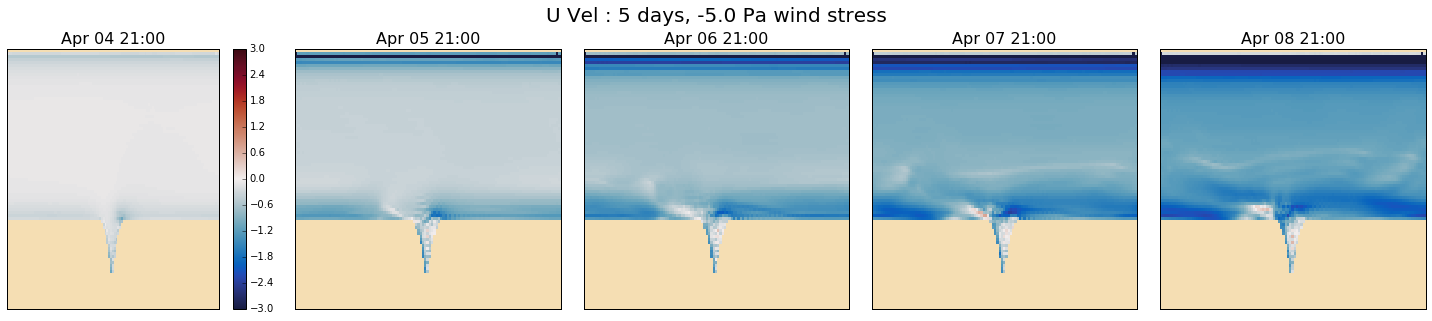

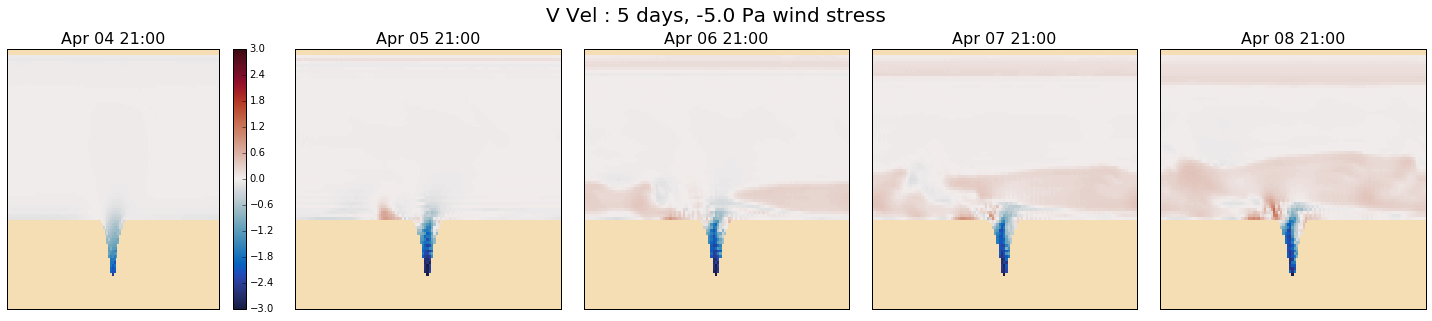

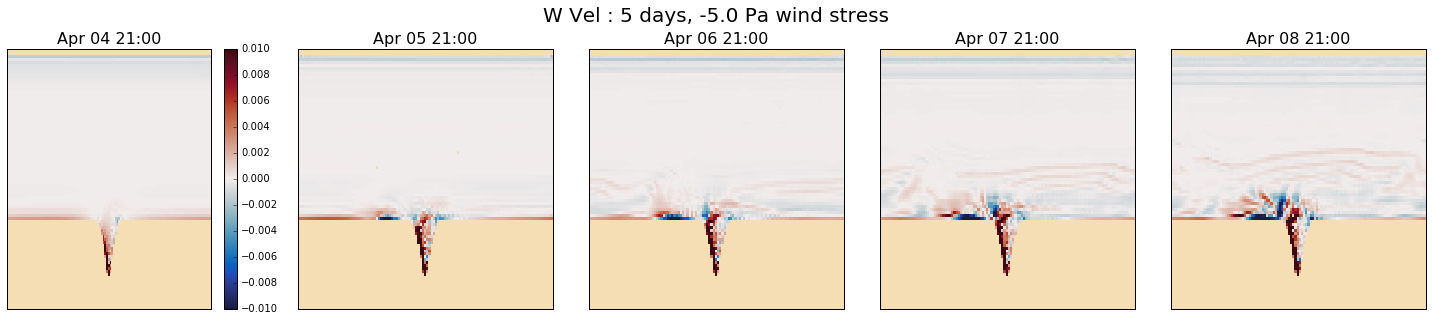

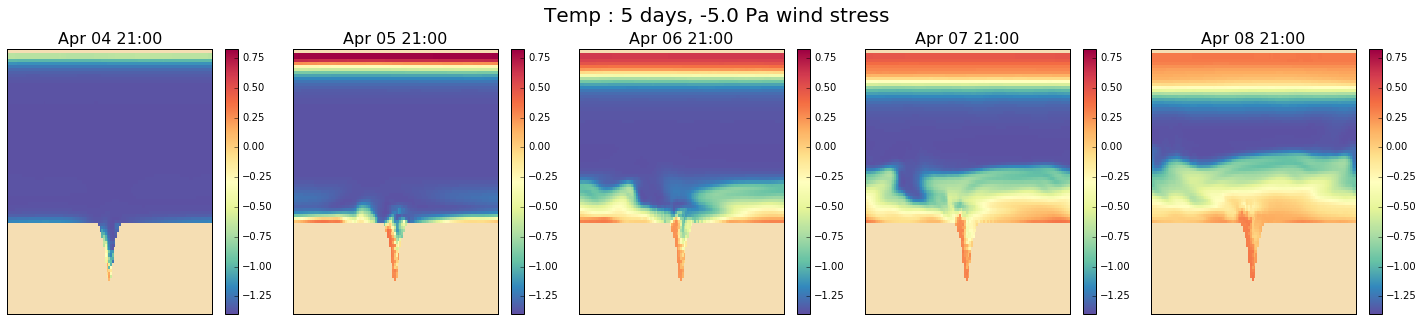

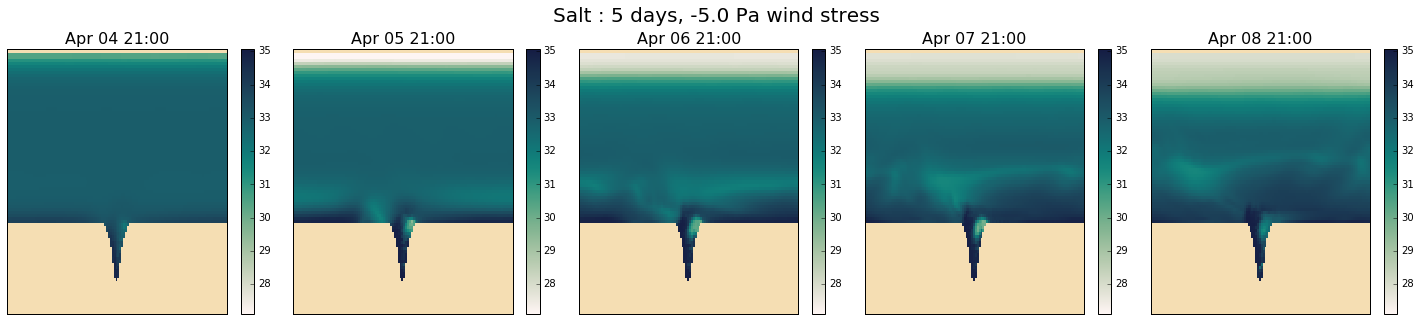

In [7]:
dep = 8; supttl = ' : 5 days, -5.0 Pa wind stress'
print(gridT_15['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_15, U_15, dep, time_inds, 3.0, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_15, V_15, dep, time_inds, 3.0, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_15, W_15, dep, time_inds, 0.01, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_15, tem_15, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_15, sal_15, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

# Run16 (Ideal) and Run17 (Real): Low Wind Stress (-0.1 Pa)

## A. Below shelf

111.224


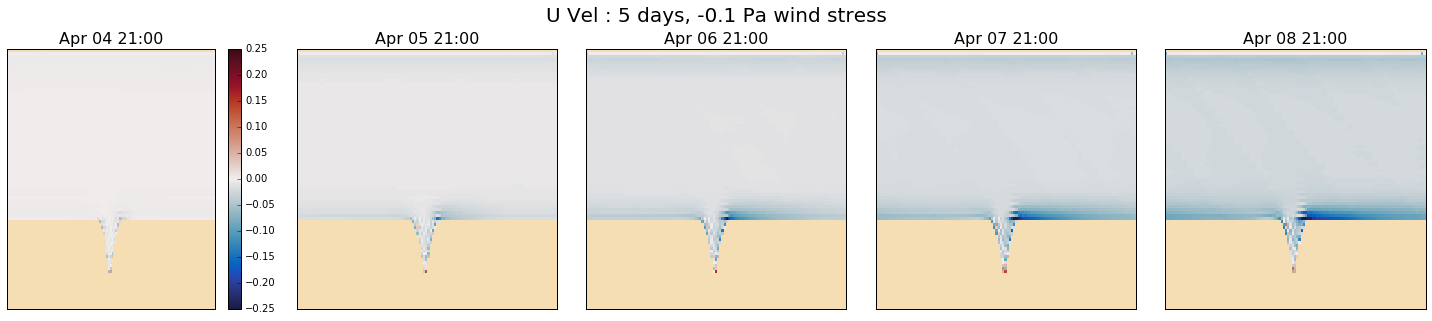

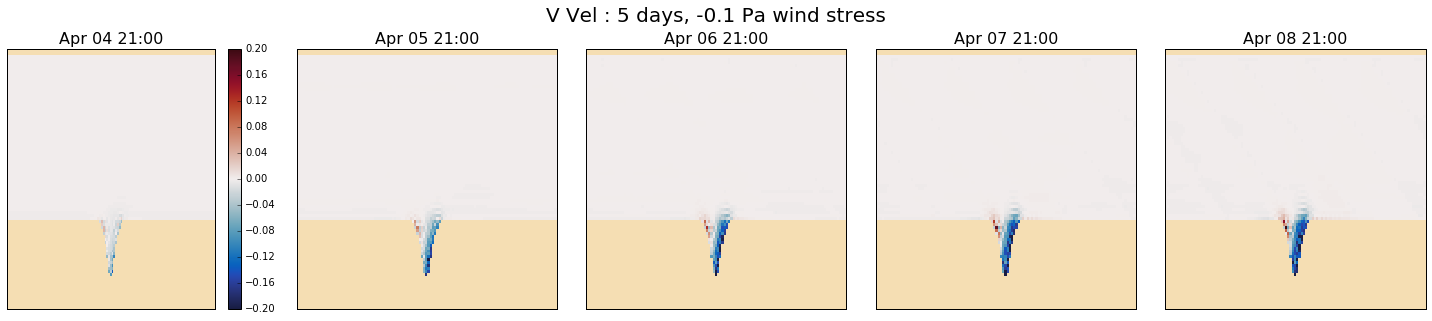

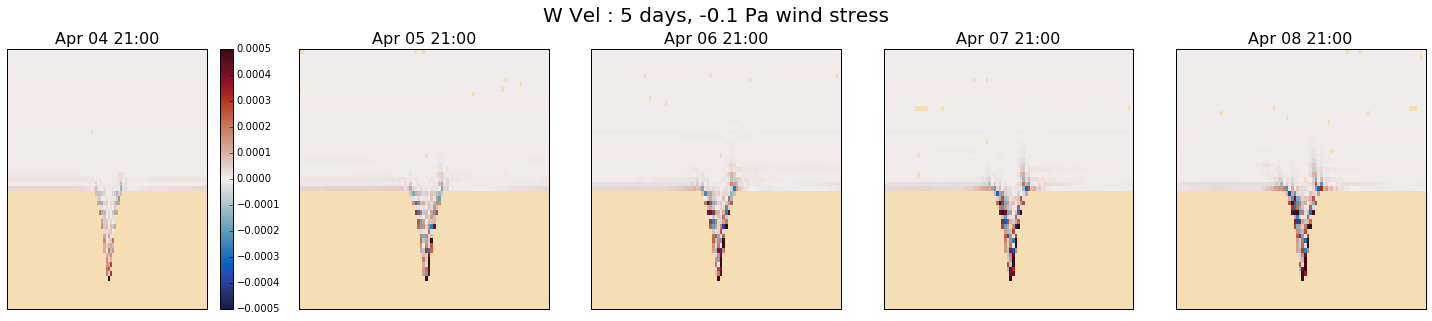

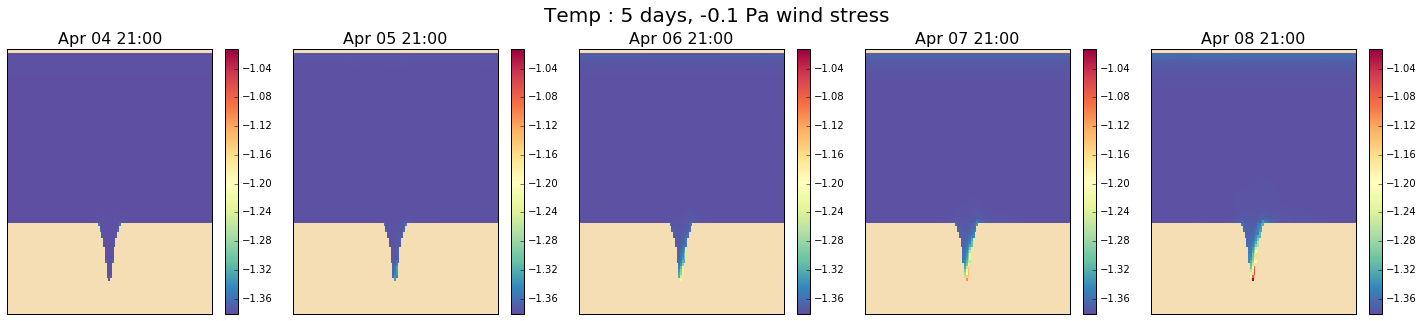

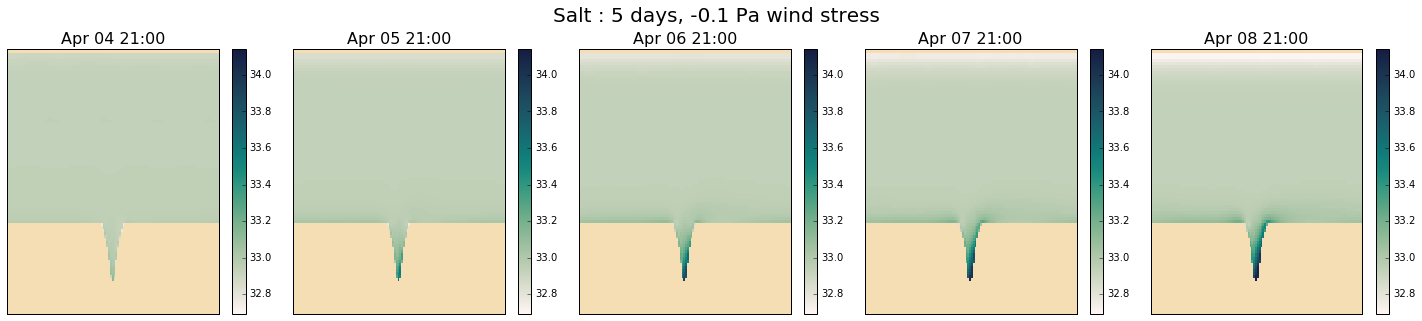

In [8]:
dep = 8; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_16['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_16, U_16, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_16, V_16, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_16, W_16[:,:,5:60,10:105], dep, time_inds, 0.0005, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_16, tem_16, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_16, sal_16, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

* look at prepare_stratification. since at maxima, could be warm water coming up from below or down from above, but because water is increasing in salinity, then that can means that it's coming up because the strat shows increasing salt with depth.

111.224


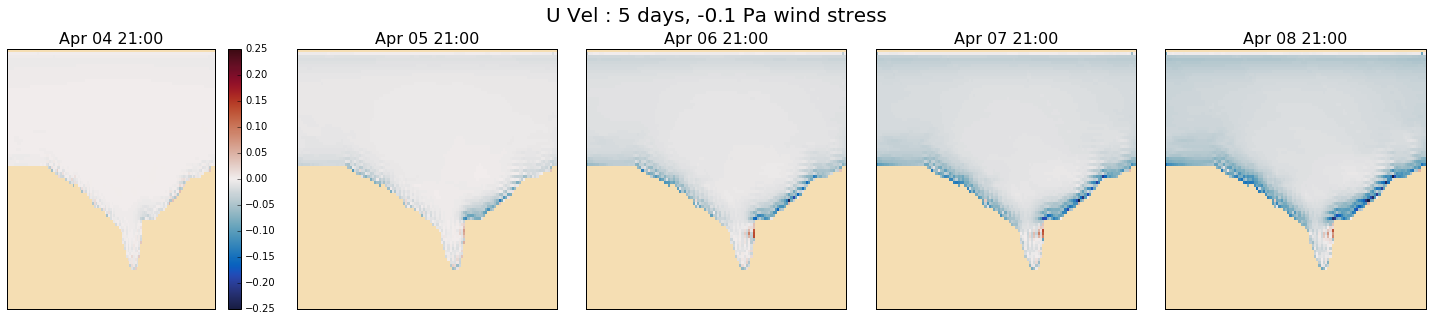

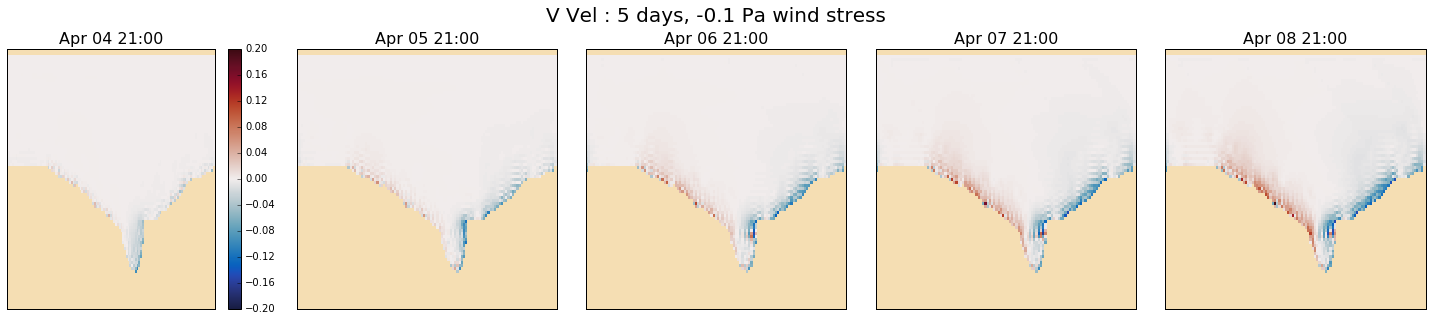

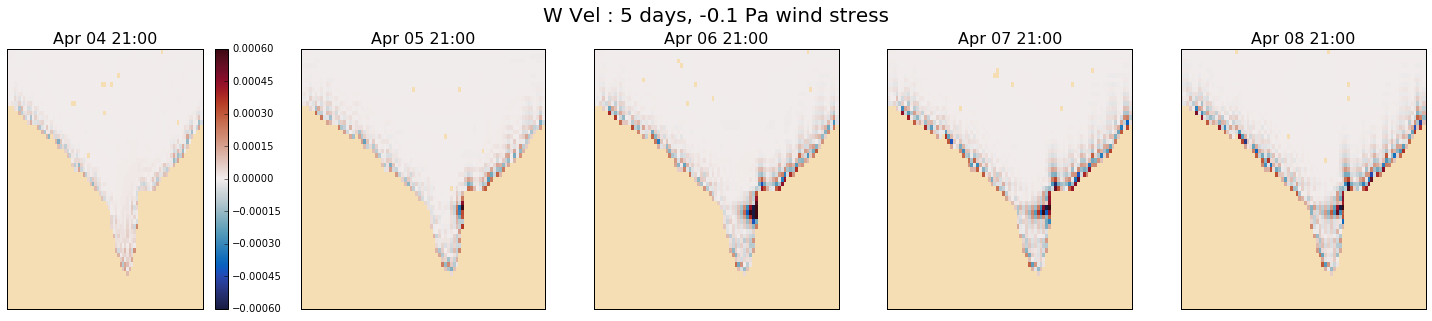

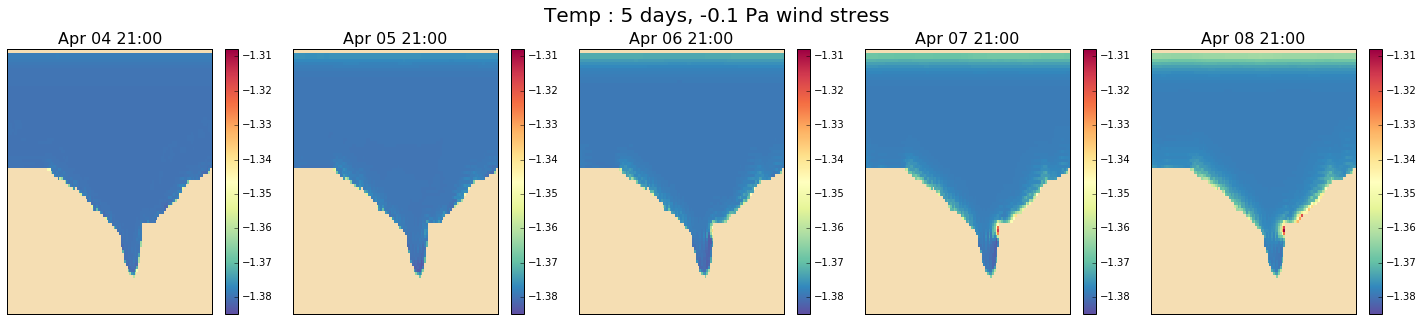

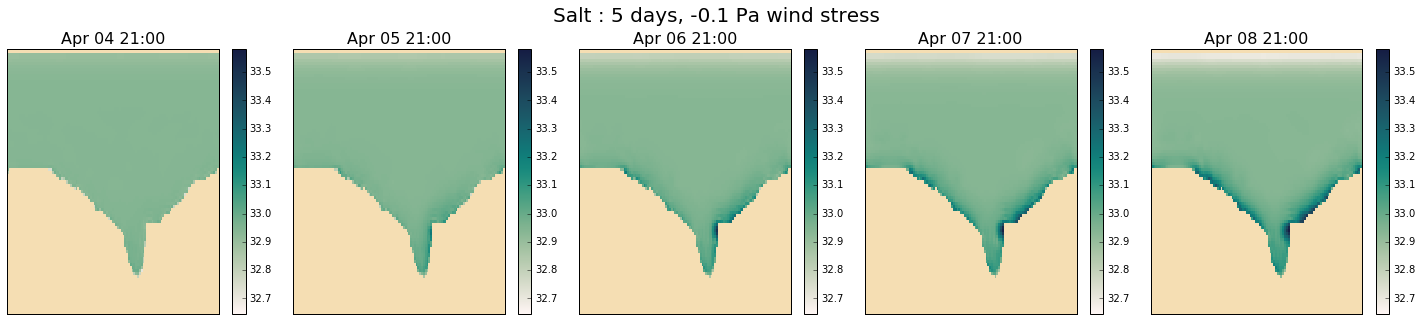

In [9]:
dep = 8; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_17['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_17, U_17, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_17, V_17, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_17, W_17[:,:,5:60,20:105], dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_17, tem_17, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_17, sal_17, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

## At the surface

4.97527


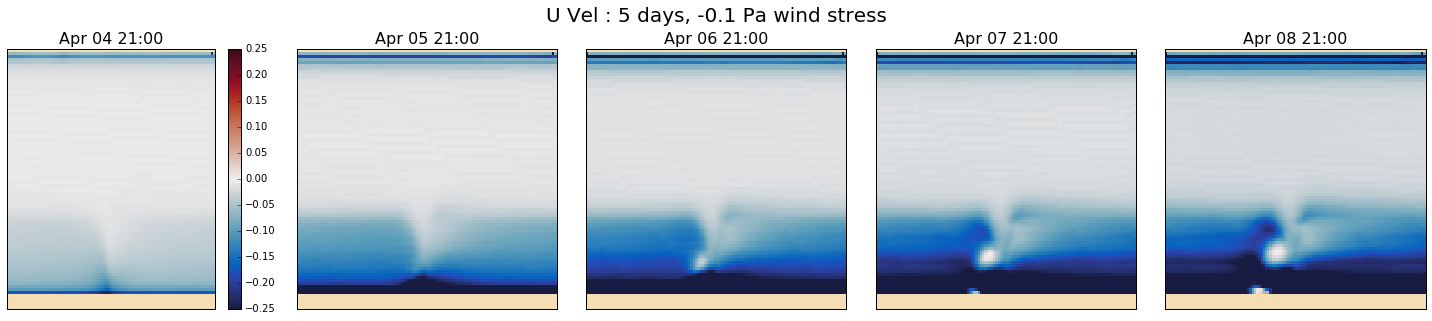

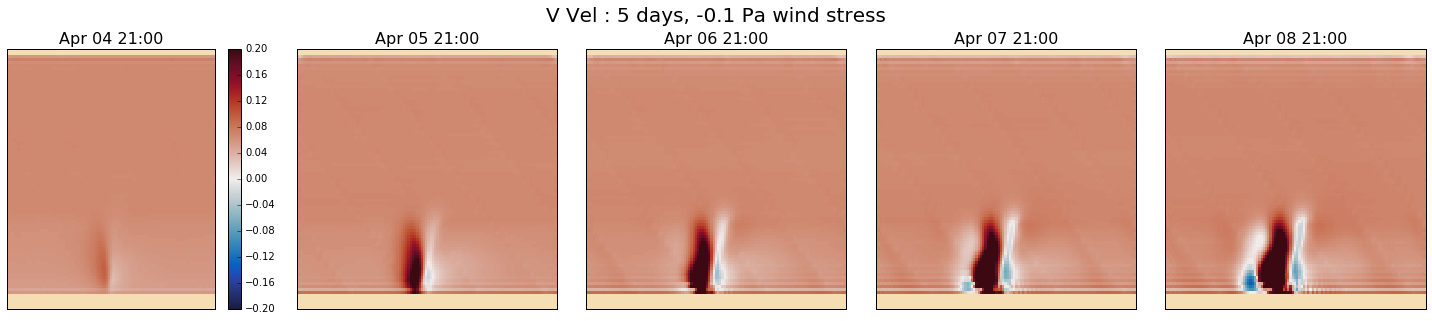

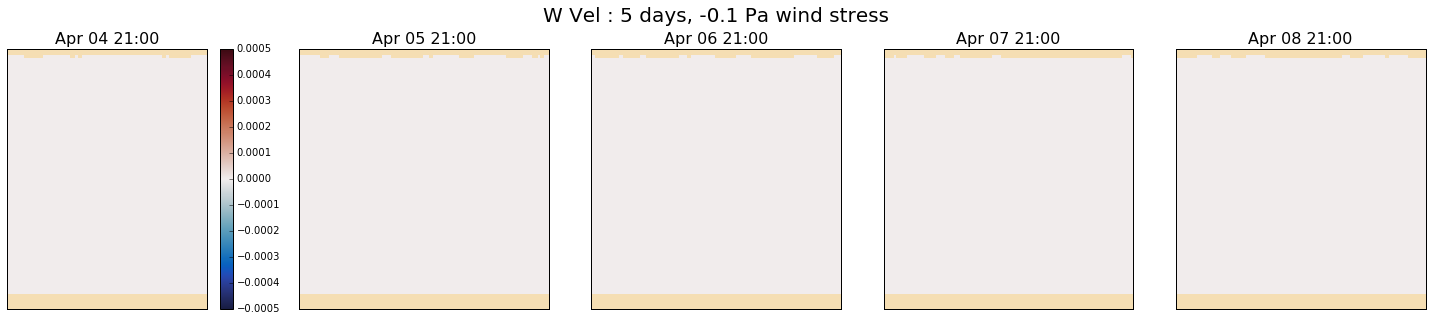

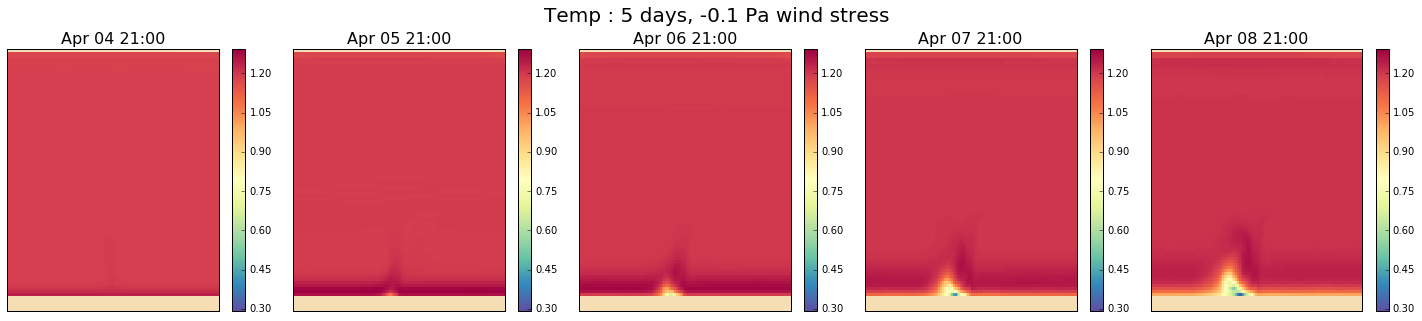

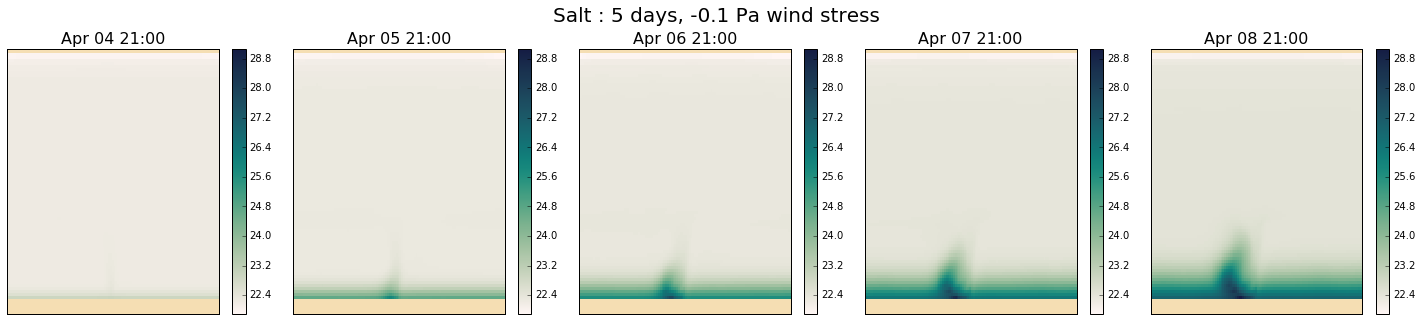

In [10]:
dep = 0; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_16['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_16, U_16, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_16, V_16, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_16, W_16, dep, time_inds, 0.0005, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_16, tem_16, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_16, sal_16, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

* look at depth 2 and 0 and it shows upwelling at head

4.97527


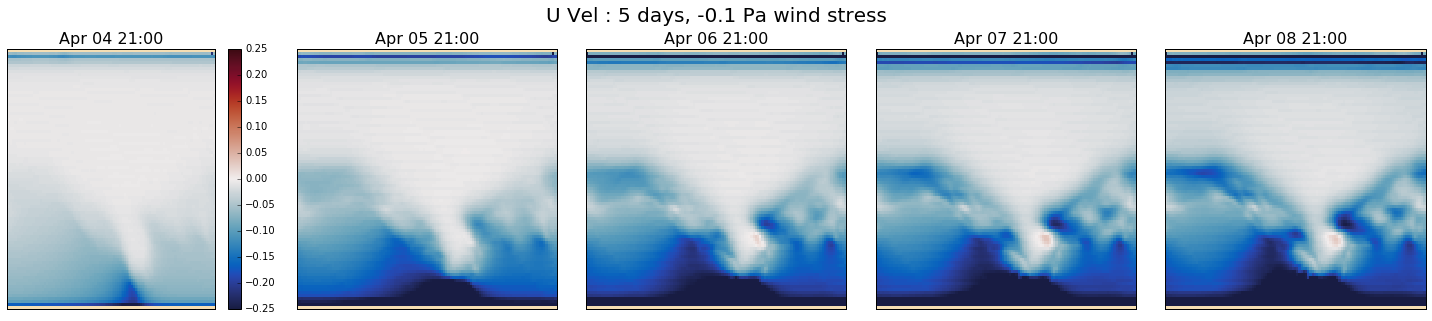

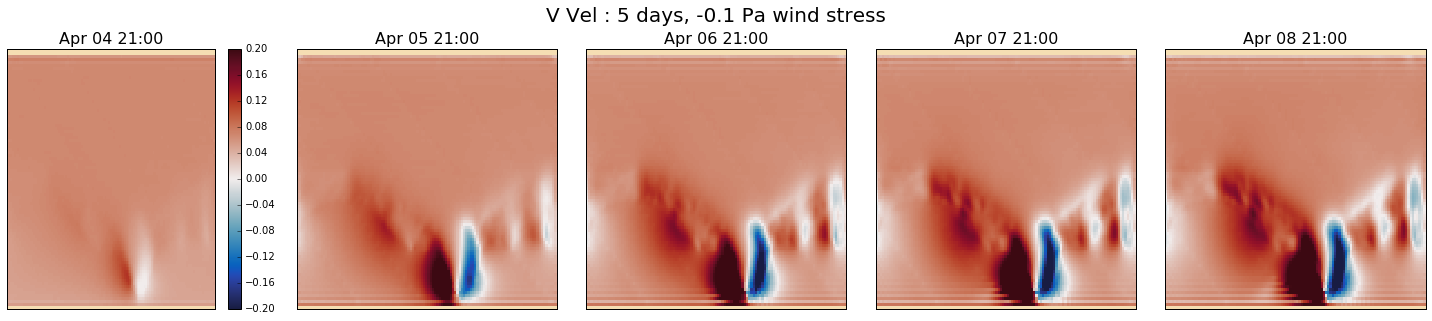

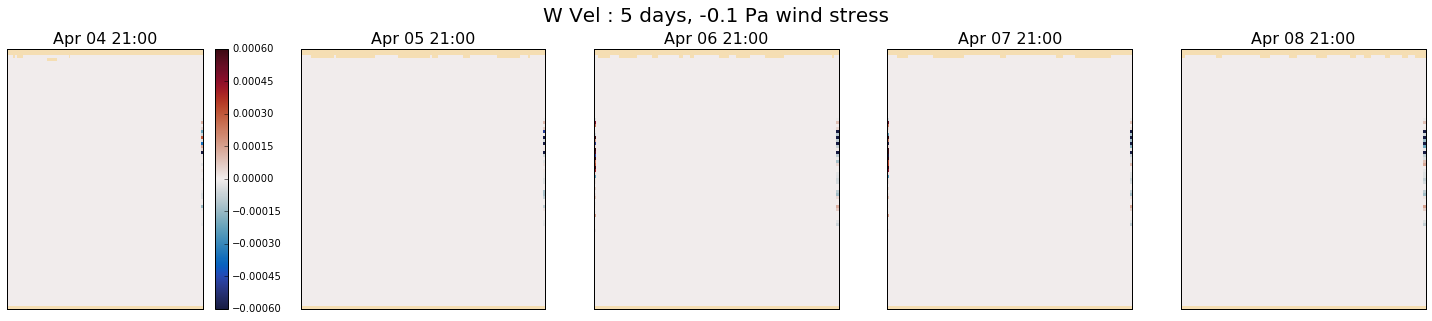

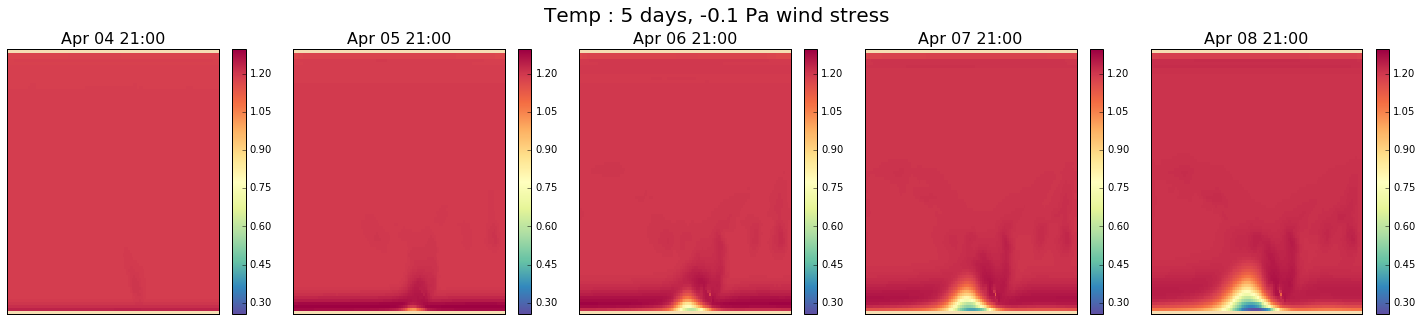

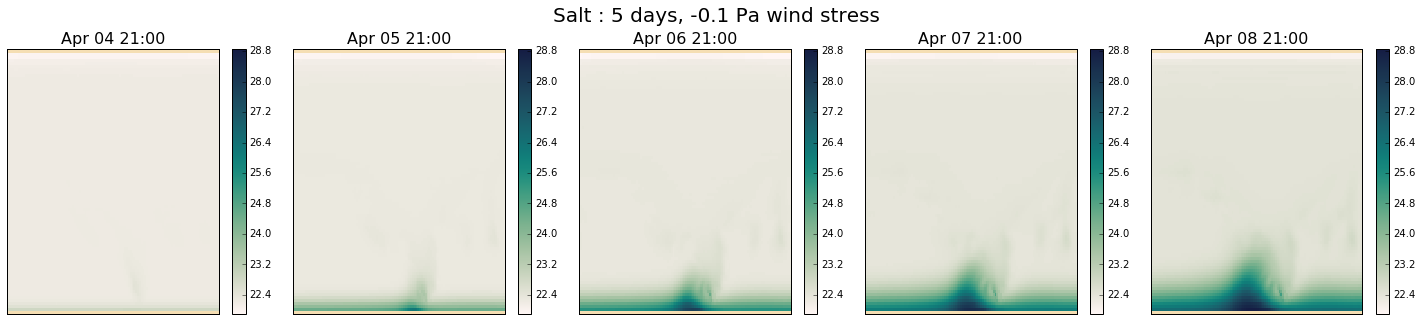

In [11]:
dep = 0; supttl = ' : 5 days, -0.1 Pa wind stress'
print(gridT_17['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_17, U_17, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_17, V_17, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_17, W_17, dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_17, tem_17, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_17, sal_17, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

# Run18 (Ideal) and Run19 (Real): Halved timestep

111.224


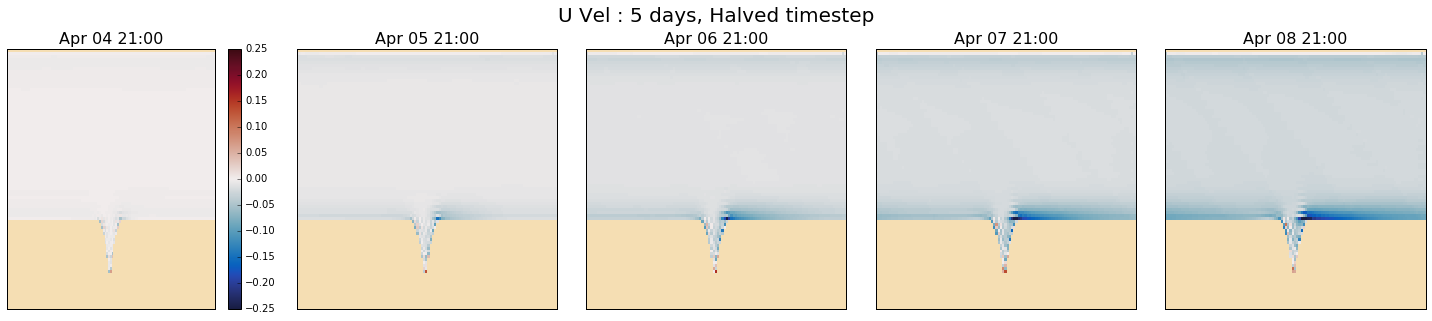

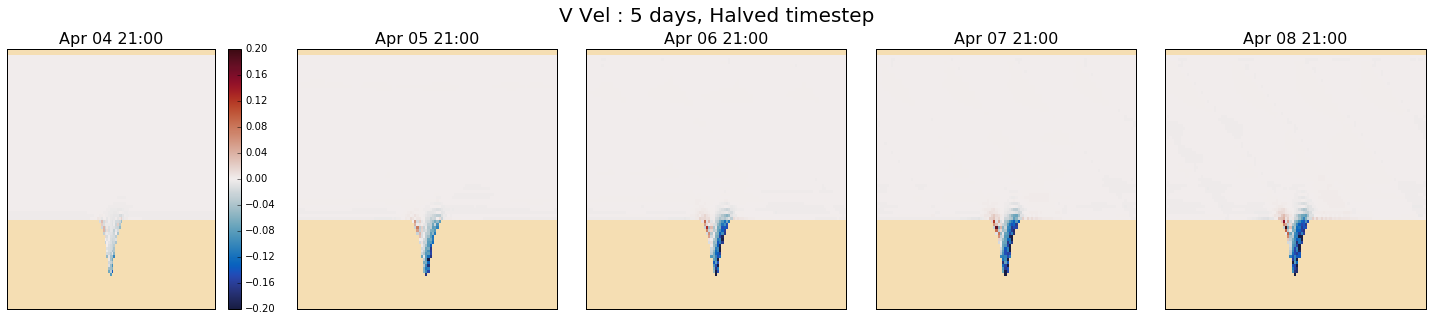

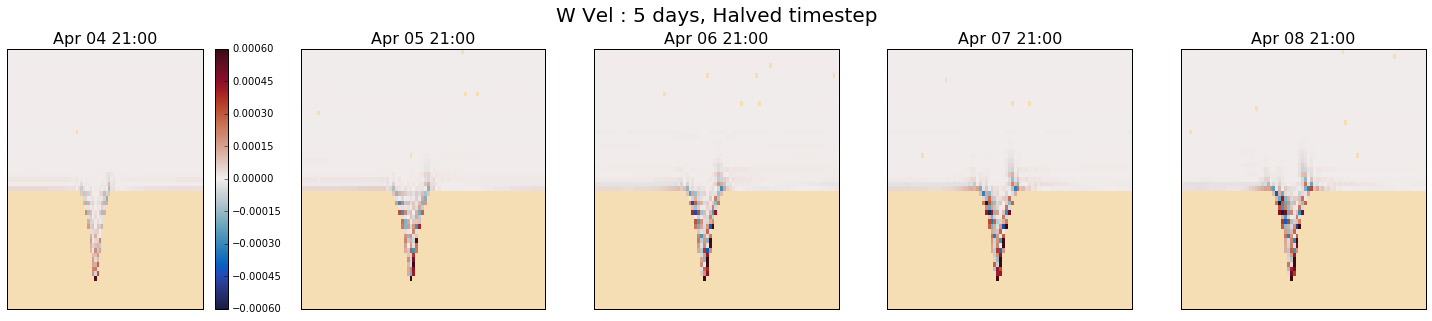

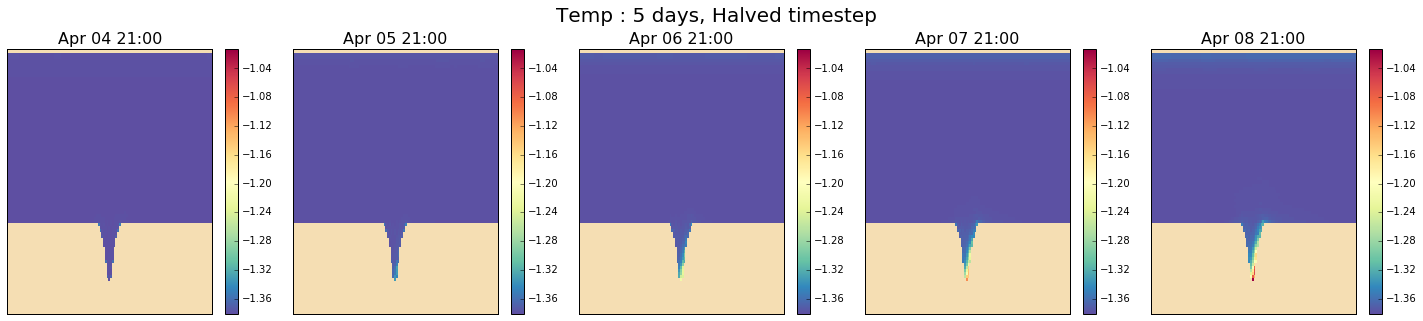

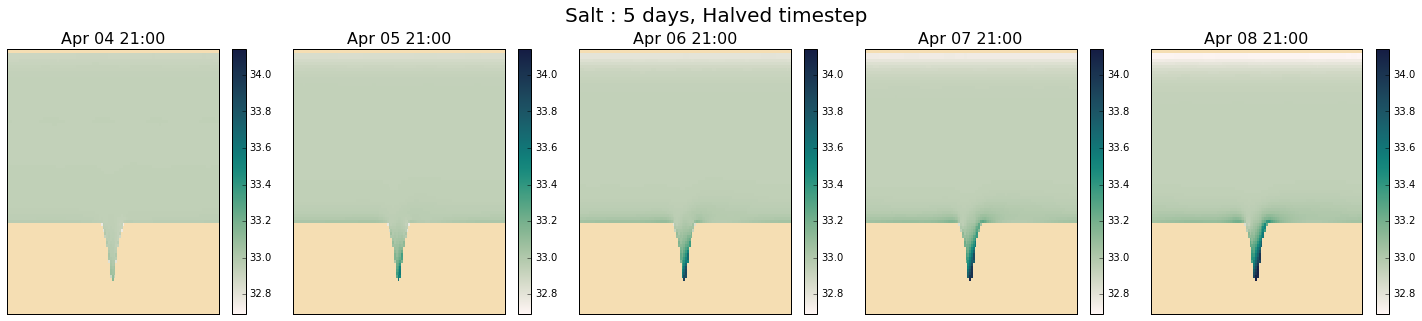

In [12]:
dep = 8; supttl = ' : 5 days, Halved timestep'
print(gridT_18['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_18, U_18, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_18, V_18, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_18, W_18[:,:,5:60,20:105], dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_18, tem_18, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_18, sal_18, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)

111.224


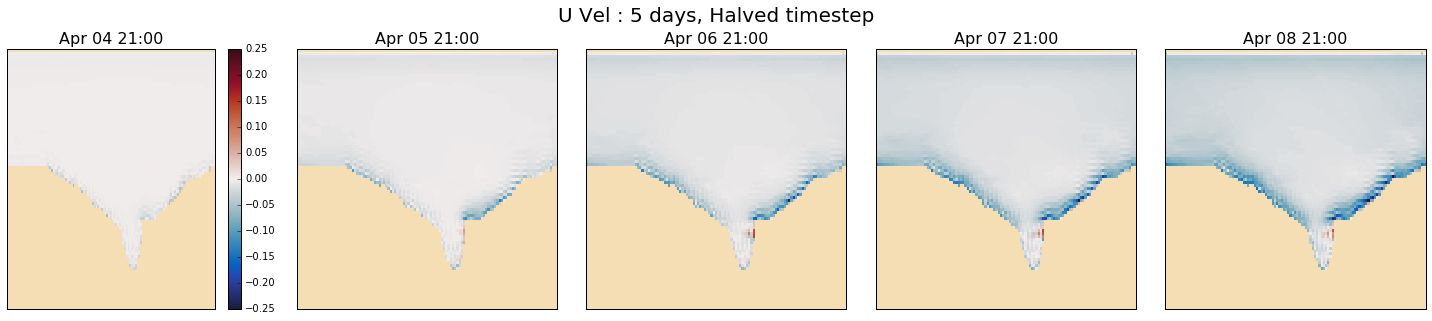

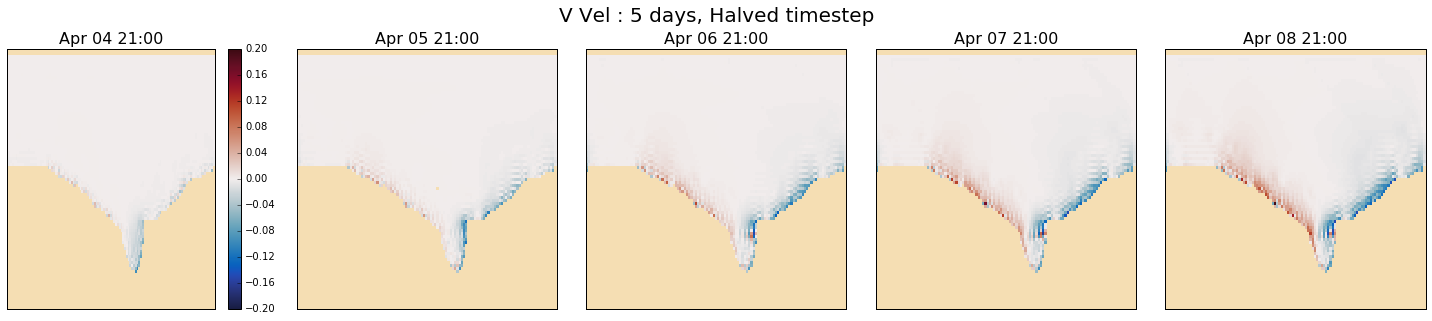

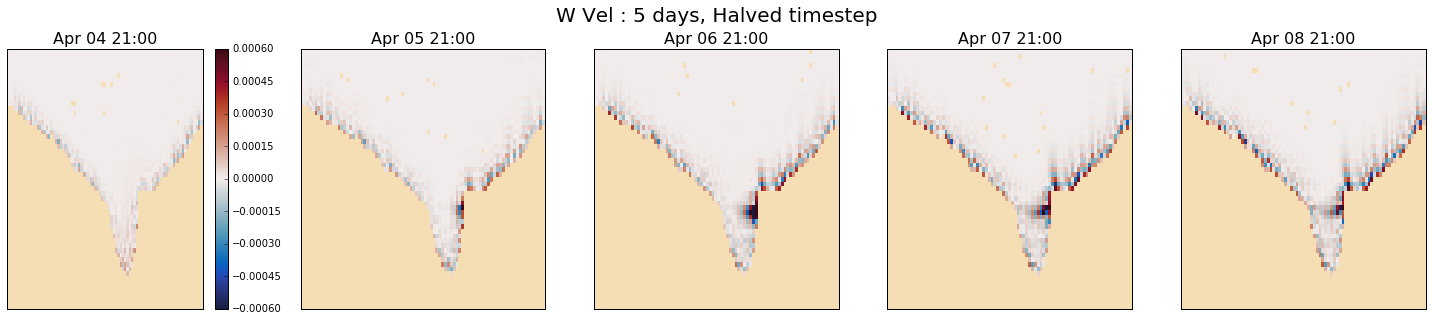

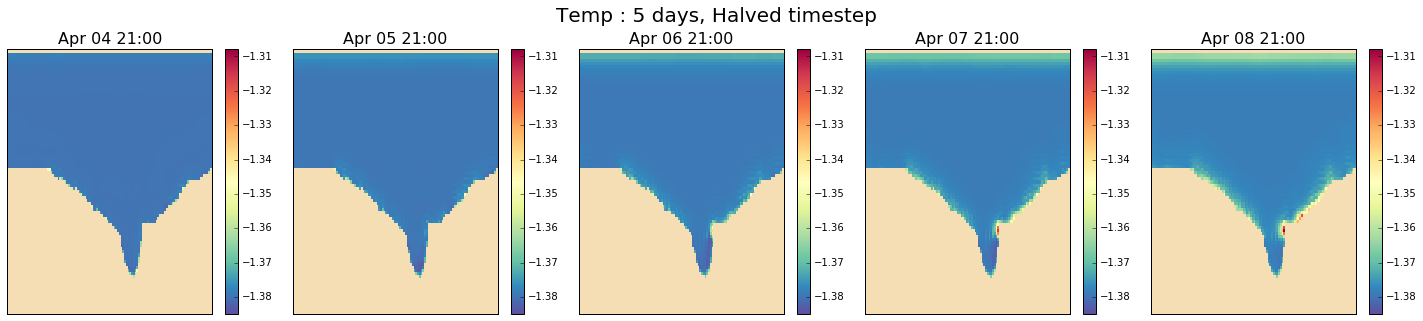

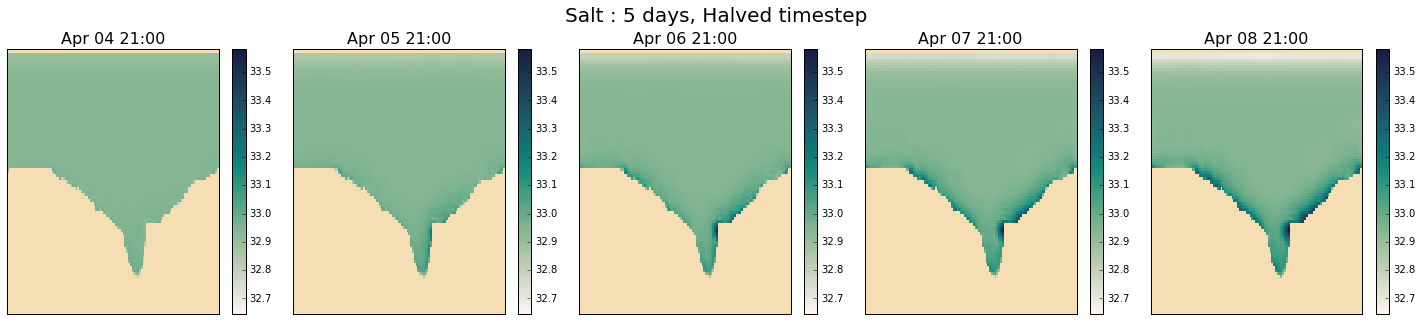

In [13]:
dep = 8; supttl = ' : 5 days, Halved timestep'
print(gridT_19['deptht'][:][dep])
time_inds = [3,7,11,15,19]
fig = plot_gyre_times(gridT_19, U_19, dep, time_inds, 0.25, cmo.cm.balance, True, 'U Vel'+supttl)
fig = plot_gyre_times(gridT_19, V_19, dep, time_inds, 0.20, cmo.cm.balance, True, 'V Vel'+supttl)
fig = plot_gyre_times(gridT_19, W_19[:,:,5:60,20:105], dep, time_inds, 0.0006, cmo.cm.balance, True, 'W Vel'+supttl)
fig = plot_gyre_times(gridT_19, tem_19, dep, time_inds, None, cm.Spectral_r, 'tem', 'Temp'+supttl)
fig = plot_gyre_times(gridT_19, sal_19, dep, time_inds, None, cmo.cm.tempo, 'sal', 'Salt'+supttl)